In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("analysis7.1.csv")
df

,Model,Location,Miles,Prices,Year,Scraped_On
0,Honda civic LX Sedan 4D,"Newport, KY",82K miles,"$13,900",2016,2024-07-01
1,Volkswagen jetta 1.8T SEL Sedan 4D,"Cincinnati, OH",67K miles · Dealership,"$4,600",2015,2024-07-01
2,Toyota corolla LE Sedan 4D,"Fort Mitchell, KY",87K miles,"$13,000",2020,2024-07-01
3,Hyundai sonata SE Sedan 4D,"Dayton, OH",110K miles,"$7,499",2016,2024-07-01
4,Hyundai elantra SE Sedan 4D,"Louisville, KY",114K miles · Dealership,"$6,500",2017,2024-07-01
...,...,...,...,...,...,...
417,BMW x3 xDrive28i Sport Utility 4D,"Cincinnati, OH",108K miles,"$11,995",2016,2024-07-01
418,Ford focus SE Sedan 4D,"Amelia, OH",150K miles,"$3,300",2015,2024-07-01
419,Honda civic LX Sedan 4D,"Cincinnati, OH",190K miles,"$3,650",2005,2024-07-01
420,Ford fusion SE Sedan 4D,"Waverly, OH",122K miles,"$4,750",2010,2024-07-01


In [3]:
def check_dealership(miles):
    if isinstance(miles, str) and "Dealership" in miles:
        return True
    else:
        return False

# Apply the function to create a new column
df['Dealership'] = df['Miles'].astype(str).apply(check_dealership)

In [4]:
df

,Model,Location,Miles,Prices,Year,Scraped_On,Dealership
0,Honda civic LX Sedan 4D,"Newport, KY",82K miles,"$13,900",2016,2024-07-01,False
1,Volkswagen jetta 1.8T SEL Sedan 4D,"Cincinnati, OH",67K miles · Dealership,"$4,600",2015,2024-07-01,True
2,Toyota corolla LE Sedan 4D,"Fort Mitchell, KY",87K miles,"$13,000",2020,2024-07-01,False
3,Hyundai sonata SE Sedan 4D,"Dayton, OH",110K miles,"$7,499",2016,2024-07-01,False
4,Hyundai elantra SE Sedan 4D,"Louisville, KY",114K miles · Dealership,"$6,500",2017,2024-07-01,True
...,...,...,...,...,...,...,...
417,BMW x3 xDrive28i Sport Utility 4D,"Cincinnati, OH",108K miles,"$11,995",2016,2024-07-01,False
418,Ford focus SE Sedan 4D,"Amelia, OH",150K miles,"$3,300",2015,2024-07-01,False
419,Honda civic LX Sedan 4D,"Cincinnati, OH",190K miles,"$3,650",2005,2024-07-01,False
420,Ford fusion SE Sedan 4D,"Waverly, OH",122K miles,"$4,750",2010,2024-07-01,False


In [5]:
def clean_miles(miles):
    if isinstance(miles, str):
        # Remove 'Dealership', '·', strip any leading or trailing whitespace,
        # remove 'miles' at the end, and convert 'K' to 1000
        cleaned_miles = miles.replace('Dealership', '').replace('·', '').strip().rstrip('miles').strip()
        if 'K' in cleaned_miles:
            cleaned_miles = float(cleaned_miles.replace('K', '')) * 1000
        return int(cleaned_miles)
    else:
        return miles

# Apply the function to update the Miles column
df['Miles'] = df['Miles'].apply(clean_miles)

# Display the updated DataFrame
df

,Model,Location,Miles,Prices,Year,Scraped_On,Dealership
0,Honda civic LX Sedan 4D,"Newport, KY",82000.0,"$13,900",2016,2024-07-01,False
1,Volkswagen jetta 1.8T SEL Sedan 4D,"Cincinnati, OH",67000.0,"$4,600",2015,2024-07-01,True
2,Toyota corolla LE Sedan 4D,"Fort Mitchell, KY",87000.0,"$13,000",2020,2024-07-01,False
3,Hyundai sonata SE Sedan 4D,"Dayton, OH",110000.0,"$7,499",2016,2024-07-01,False
4,Hyundai elantra SE Sedan 4D,"Louisville, KY",114000.0,"$6,500",2017,2024-07-01,True
...,...,...,...,...,...,...,...
417,BMW x3 xDrive28i Sport Utility 4D,"Cincinnati, OH",108000.0,"$11,995",2016,2024-07-01,False
418,Ford focus SE Sedan 4D,"Amelia, OH",150000.0,"$3,300",2015,2024-07-01,False
419,Honda civic LX Sedan 4D,"Cincinnati, OH",190000.0,"$3,650",2005,2024-07-01,False
420,Ford fusion SE Sedan 4D,"Waverly, OH",122000.0,"$4,750",2010,2024-07-01,False


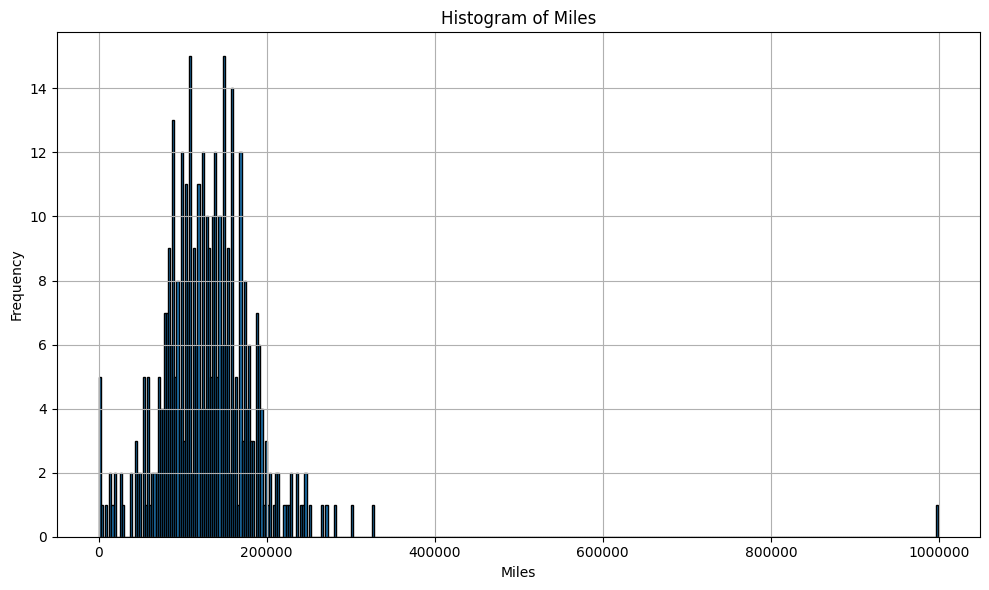

In [6]:
# Plotting histogram of 'Miles'
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
plt.hist(df['Miles'], bins=400, edgecolor='black')  # Adjust number of bins as needed
plt.title('Histogram of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True)
# Formatting x-axis ticks as integers
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()

# Show plot
plt.show()

In [7]:
max_miles_index = df['Miles'].idxmax()

# Retrieve the row with the highest 'Miles'
row_with_max_miles = df.loc[max_miles_index]

print("Row with Highest Miles:")
print(row_with_max_miles)

Row with Highest Miles:
Model          Toyota camry SE Sedan 4D
Location                 Greensburg, IN
Miles                          999000.0
Prices                           $1,999
Year                               2005
Scraped_On                   2024-07-01
Dealership                        False
Name: 394, dtype: object


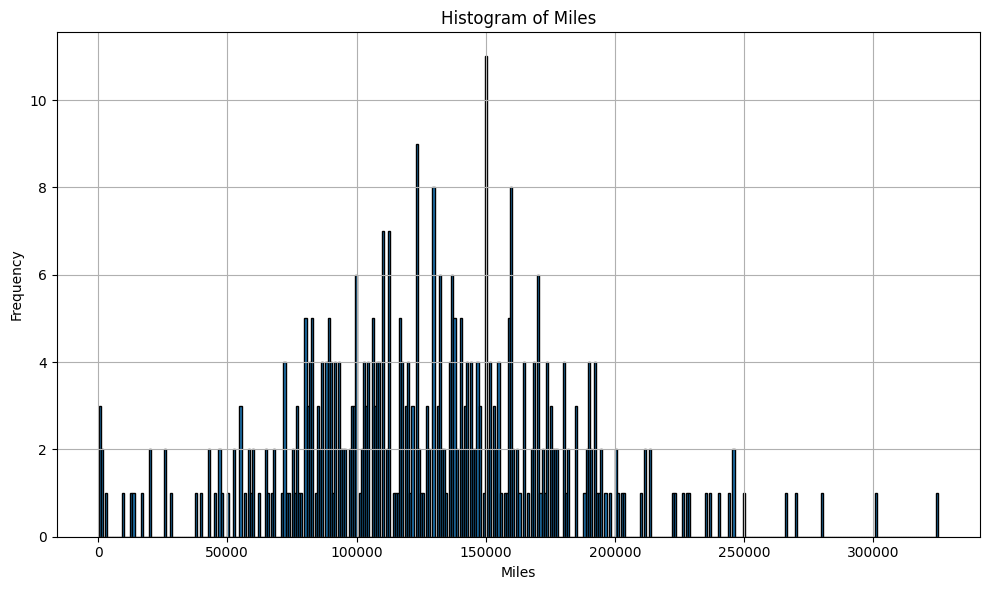

In [8]:
df = df.drop(max_miles_index)
# Plotting histogram of 'Miles'
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
plt.hist(df['Miles'], bins=400, edgecolor='black')  # Adjust number of bins as needed
plt.title('Histogram of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.grid(True)
# Formatting x-axis ticks as integers
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()

# Show plot
plt.show()

In [9]:
min_miles_index = df['Miles'].idxmin()

# Retrieve the row with the highest 'Miles'
row_with_min_miles = df.loc[min_miles_index]

print("Row with Lowest Miles:")
print(row_with_min_miles)

Row with Lowest Miles:
Model          Nissan altima sr (down-payment)
Location                        Cincinnati, OH
Miles                                    300.0
Prices                                  $2,000
Year                                      2024
Scraped_On                          2024-07-01
Dealership                               False
Name: 142, dtype: object
